# Otros Modelos: Polynomial regression/Regresión Polinómica



### Concepto y modelado


En muchas ocasiones la relación entre los datos no va a ser lineal, por lo que una simple regresión lineal no se va a ajustar bien a nuestra problemática.

Por ejemplo, en el siguiente ejemplo encajaria muy bien una regresión lineal.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline 

df = pd.read_csv('data/salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


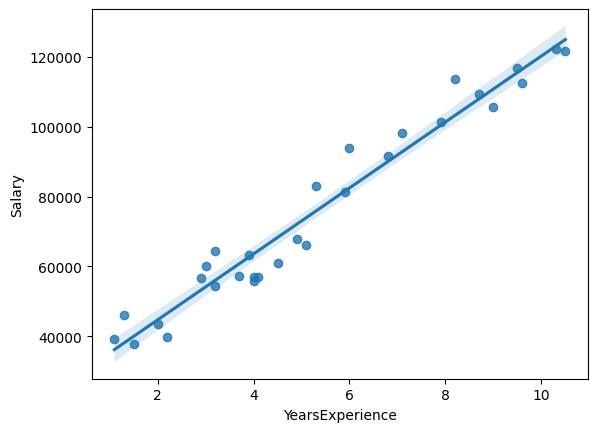

In [2]:
sns.regplot(data=df,  # regplot una nueva herramienta visual para tu caja de herramientas
            x="YearsExperience",
            y="Salary");

En la vida real los problemas son más complejos, ya que los salarios no llevan una subida lineal vs años de experiencia, dependerá también de la carrera profesional: profesor, ingeniero, doctor...

Otra posible representación del salario podría ser en función del puesto de trabajo.

In [3]:
df = pd.read_csv('data/position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Vamos a construir un modelo que tenga en cuenta el "nivel" profesional

In [4]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

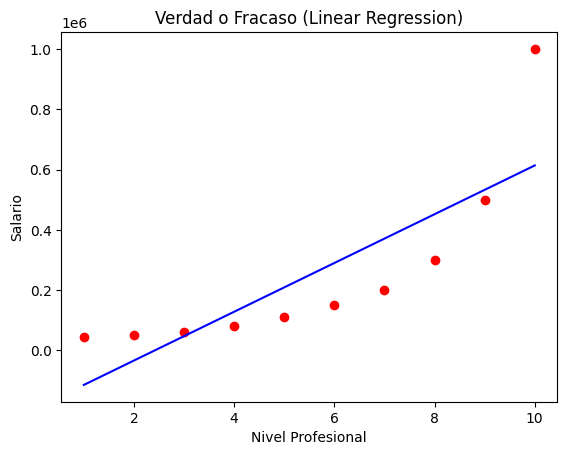

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Verdad o Fracaso (Linear Regression)')
    plt.xlabel('Nivel Profesional')
    plt.ylabel('Salario')
    plt.show()
    return
viz_linear()

Vemos que en este caso, la regresión lineal no se ajusta nada bien a los datos, por lo que habrá que probar otras alternativas. Observa los errores:

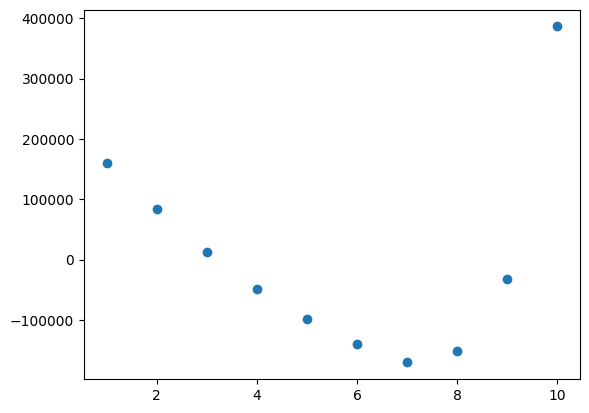

In [6]:
plt.scatter(X, y - lin_reg.predict(X));

Y aquí es donde entra la **regresión polinómica** que consiste en aplicar una transformación a nuestra $y = a_0 + a_1*x_1 + a_2*x_2 + a_3*x_3 + ...$ (donde $x_i$ son las features y $a_i$ los coeficientes o pesos o parámetros de una regresión lineal) sencilla pero potente. En vez de esa relación vamos a utilizar también los cuadrados, cubos, etc de las mismas features y de los productos de las mismas:

$$y = a_0 + a_1*x_1 + a_2*x_1^2 + a_3*(x_1*x_2) + a_4*x_2^2 + a5*x_3^2 + a_6*(x_1*x_3) + a_7*(x_2*x_3) + a_8*x_1^3...$$

El grado de la regresión polinómica es el máximo exponente al que elevaremos las features (en el caso anterior sería 3). Por otro lado, fíjate que es como crear una regresión lineal incluyendo las features "creadas" o "sintéticas" ($x_1^2, x_2^2, x_3^2, x_1^3, x_2^3, x_3^3, x_1*x_2,x_1*x_3,x_2*x_3,x_1*x_2^2,...$, etc)

**

Por supuesto, `sklearn` tiene su clase que se encarga de obtener esas features "sintéticas" y luego nosotros haremos la regresión lineal con todo el nuevo conjunto de datos. Eso sí, tendrás que indicarle el grado :-) a través del argumento `degree`. La clase es `PolynomialFeatures`. Veamos cómo, pero antes observa que también crea los productos combinados de features:

In [7]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
poly_reg.fit(X)
X_poly = poly_reg.transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

Como solo teniamos una feature ($x_1$) creará un nuevo dataset con:

$$(x_1^0, x_1^1, x_1^2, x_1^3)$$

Ahora ejecutamos el modelado y veamos la comparativa:

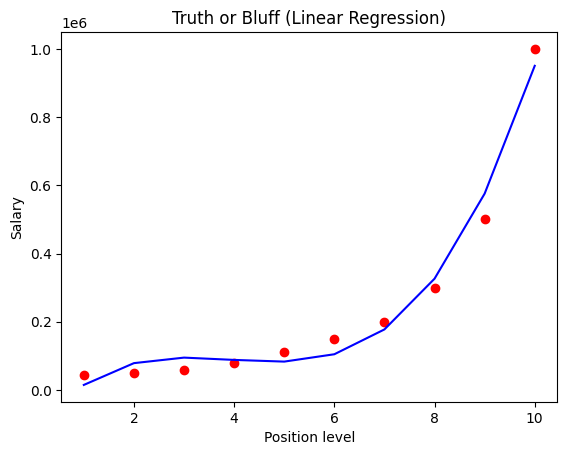

In [9]:

# Linear regression
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

### Sobreajuste

El problema es que si añadimos mucha complejidad (empleamos grados muy altos) podemos sobreajustar el modelo fácilmente. Por ejemplo ejecutemos la siguiente celda (en la que se crean unos datos sintéticos y luego se ajusta un modelo de regresión polinómica forzado para el sobreajuste)

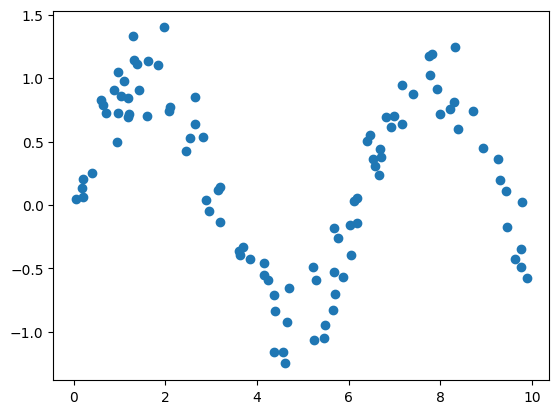

In [10]:


# Paso 1: Generar datos sintéticos
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # 100 puntos aleatorios entre 0 y 10
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])  # y = sin(x) con ruido
plt.scatter(X,y);


In [11]:

# Paso 2: Ajustar un modelo de regresión polinómica de alto grado
grado = 15  # Grado del polinomio
poly_overfitting = PolynomialFeatures(degree= grado)
X_poly = poly_overfitting.fit_transform(X)
modelo = LinearRegression()
modelo.fit(X_poly, y)


LinearRegression()

In [12]:
X

array([[5.48813504],
       [7.15189366],
       [6.02763376],
       [5.44883183],
       [4.23654799],
       [6.45894113],
       [4.37587211],
       [8.91773001],
       [9.63662761],
       [3.83441519],
       [7.91725038],
       [5.2889492 ],
       [5.68044561],
       [9.25596638],
       [0.71036058],
       [0.871293  ],
       [0.20218397],
       [8.32619846],
       [7.78156751],
       [8.70012148],
       [9.78618342],
       [7.99158564],
       [4.61479362],
       [7.80529176],
       [1.18274426],
       [6.39921021],
       [1.43353287],
       [9.44668917],
       [5.21848322],
       [4.1466194 ],
       [2.64555612],
       [7.74233689],
       [4.56150332],
       [5.68433949],
       [0.187898  ],
       [6.17635497],
       [6.12095723],
       [6.16933997],
       [9.43748079],
       [6.81820299],
       [3.59507901],
       [4.37031954],
       [6.97631196],
       [0.60225472],
       [6.66766715],
       [6.7063787 ],
       [2.10382561],
       [1.289

In [13]:
X_poly

array([[1.00000000e+00, 5.48813504e+00, 3.01196262e+01, ...,
        4.09753108e+09, 2.24878039e+10, 1.23416104e+11],
       [1.00000000e+00, 7.15189366e+00, 5.11495830e+01, ...,
        1.28077733e+11, 9.15998328e+11, 6.55112264e+12],
       [1.00000000e+00, 6.02763376e+00, 3.63323688e+01, ...,
        1.38646572e+10, 8.35710760e+10, 5.03735839e+11],
       ...,
       [1.00000000e+00, 2.01075462e-01, 4.04313414e-02, ...,
        8.78350746e-10, 1.76614782e-10, 3.55128989e-11],
       [1.00000000e+00, 8.28940029e+00, 6.87141572e+01, ...,
        8.72570361e+11, 7.23308500e+12, 5.99579369e+13],
       [1.00000000e+00, 4.69547619e-02, 2.20474967e-03, ...,
        5.39306131e-18, 2.53229910e-19, 1.18903501e-20]], shape=(100, 16))

In [14]:
X_poly.shape

(100, 16)

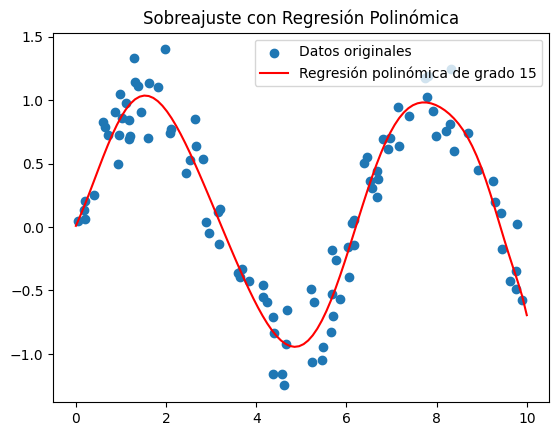

In [15]:


# Paso 3: Visualizar los resultados
X_test = np.linspace(0, 10, 100)[:, np.newaxis]
X_test_poly = poly_overfitting.transform(np.linspace(0, 10, 100)[:, np.newaxis])
y_pred = modelo.predict(X_test_poly)

plt.scatter(X, y, label="Datos originales")
plt.plot(X_test, y_pred, color='red', label=f"Regresión polinómica de grado {grado}")
plt.legend()
plt.title("Sobreajuste con Regresión Polinómica")
plt.show()


El ajuste es casi perfecto, lo cual quiere decir que en la realidad con datos nuevos que cambiarán algo el patrón el modelo dejará de generalizar perfectamente (olvida por un momento que hemos hecho los datos sintéticos)

### Predicciones

Y para terminar, para obtener las predicciones de un nuevo valor (o de un conjunto de test), observa que en realidad hemos aplicado una transformación al train (como hacemos cuando aplicamos logaritmos para normalizar algunas distribuciones) y por tanto lo que hay que hacer es aplicar dicha tranformación a los datos de entrada.

In [16]:
# Predicting a new result with Linear Regression
print(lin_reg.predict([[5.5]]))

# Predicting a new result with Polymonial Regression
print(pol_reg.predict(poly_reg.transform([[5.5]])))

[249500.]
[89187.5]


In [17]:
pol_reg.coef_.shape

(4,)